Numpy Review

In [2]:
import numpy as np

In [ ]:
#Numpy tutorial part
np.random.seed() # Defines the Pseudo-random number to have a pre-defined random generated numbers

# ndarray n-dimensional array. Fixed-size
nsecond = np.arange(5) # To create 1D ndarray we can use arrange method. 
print(nsecond)
print()

nthird = np.arange(start=1, stop=6, step=2) # We can supply the boundaries and step size to arrange function
print(nthird)
print()

nfourth = np.random.randint(low=0, high=10, size=(3,4)) # Creates random ndarray with given bounds and size
print(nfourth)
print()

a = np.arange(6)
b = np.arange(6)
nfifth = np.column_stack((a,b)) # Stacks two ndarrays together
print(nfifth)
print()

c = a.reshape(3,2) # Changing the shape of an ndarray
print(c)
print()

transposed = c.T
print(transposed)
print()

diag = np.diag([1,2,3]) # Creates a matrix with diagonal elements as given into the function
print(diag)
print()

[0 1 2 3 4]

[1 3 5]

[[0 6 7 5]
 [6 9 0 5]
 [0 6 1 7]]

[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]]

[[0 1]
 [2 3]
 [4 5]]

[[0 2 4]
 [1 3 5]]

[[1 0 0]
 [0 2 0]
 [0 0 3]]



Importing required libraries for Matplotlib examples

In [33]:
import urllib.request
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

Simple Line Chart Example

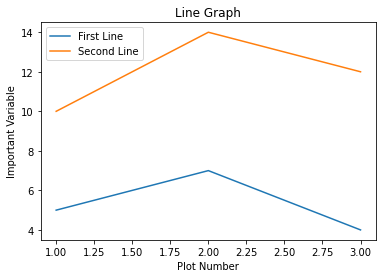

In [ ]:
x = [1,2,3]
y = [5,7,4]
x2 = [1,2,3]
y2 = [10,14,12]

plt.plot(x, y,label = 'First Line')
plt.plot(x2, y2, label = 'Second Line')

plt.xlabel('Plot Number')
plt.ylabel('Important Variable')
plt.title('Line Graph')
plt.legend()
plt.show()

Bar Chart Example

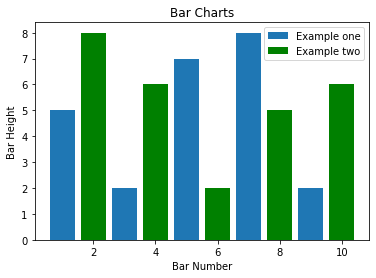

In [ ]:
plt.bar([1,3,5,7,9],[5,2,7,8,2], label="Example one")
plt.bar([2,4,6,8,10],[8,6,2,5,6], label="Example two", color='g')

plt.legend()
plt.xlabel('Bar Number')
plt.ylabel('Bar Height')

plt.title('Bar Charts')

plt.show()

Histogram Chart Example

No handles with labels found to put in legend.


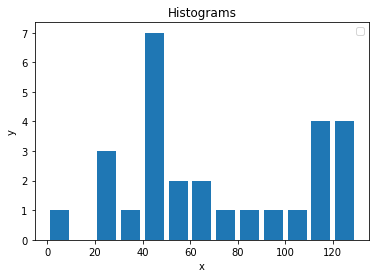

In [ ]:
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]

bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Histograms')
plt.legend()
plt.show()

Scatter Chart Example

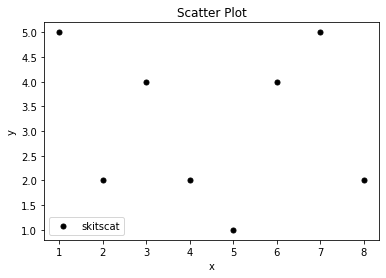

In [ ]:
x = [1,2,3,4,5,6,7,8]
y = [5,2,4,2,1,4,5,2]

plt.scatter(x,y, label='skitscat', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.legend()
plt.show()

Stack Chart Example

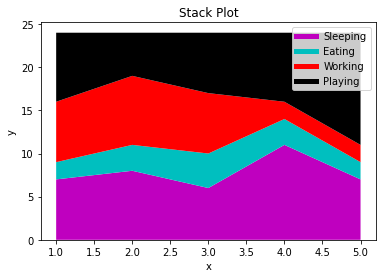

In [ ]:
days = [1,2,3,4,5]
sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

plt.plot([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)

plt.stackplot(days, sleeping, eating, working, playing, colors=['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Stack Plot')
plt.legend()
plt.show()

Pie Chart Example

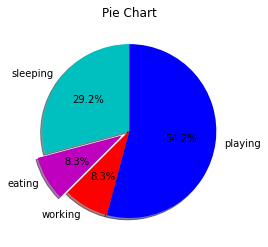

In [ ]:
slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')

plt.title('Pie Chart')
plt.show()

Reading data from file with CSV library

In [ ]:
import csv

x = []
y = []

with open('example.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y, label='Loaded from file!')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph from CSV')
plt.legend()
plt.show()

Reading data from file with Numpy example

In [ ]:
x, y = np.loadtxt('example.txt', delimiter=',', unpack=True)
plt.plot(x,y, label='Loaded from file!')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

Reading Data From the Internet - Stock Price Chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  """


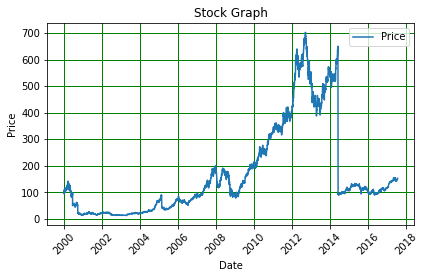

In [25]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')

    for label in ax1.xaxis.get_ticklabels():  #In order to set the dates 45 degree
        label.set_rotation(45)                #to horizontal axis

    ax1.grid(True, color='g', linestyle='-', linewidth=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.2, right=0.94, top=0.90, wspace=0.2, hspace=0) #Adjusting the canvas geometry
    plt.show()

graph_data('TSLA')

Gain and Loss Chart

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  


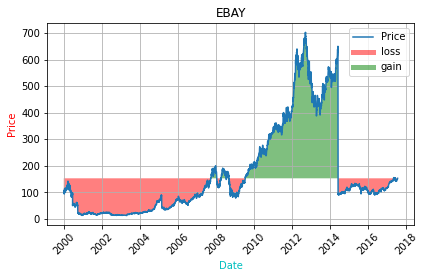

In [27]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    ax1.plot_date(date, closep,'-', label='Price')

    ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5) # Legends for 
    ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5) # loss and gain

    ax1.fill_between(date, closep, closep[0],where=(closep > closep[0]), facecolor='g', alpha=0.5) # Conditional 
    ax1.fill_between(date, closep, closep[0],where=(closep < closep[0]), facecolor='r', alpha=0.5) # fills
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    ax1.xaxis.label.set_color('c')
    ax1.yaxis.label.set_color('r')
    #ax1.set_yticks([0,25,50,75])

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')